In [1]:
import numpy as np
import pandas as pd

In [2]:
delivery=pd.read_csv("deliveries.csv")

In [3]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


 ### No of runs scored by every batsman to find the top 5 batsman

In [4]:
runs=delivery.groupby('batsman')

In [5]:
runs.get_group('V Kohli')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150410,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,5,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150414,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,3,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150415,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,4,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
runs.get_group('V Kohli').shape # no of balls run by virat kohli in 10 years=no of rows

(3494, 21)

In [7]:
runs['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [8]:
runs['batsman_runs'].sum().sort_values(ascending= False).head() # TOP 5 BATSMAN

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

### To find the top 5 batsman in 10 years who hit  max 6 runs 

In [9]:
mask=delivery['batsman_runs']==6 # to find the dataset which runs==6
new_delivery=delivery[mask] 

In [10]:
new_delivery.shape[0]# to find how many total 6 runs hit in IPL till now

6523

In [11]:
new_delivery.groupby('batsman')['batsman_runs'].count().sort_values(ascending= False).head(5)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

  ### To find which top 3 teams  are there for which virat kohli played against and hit max runs

In [12]:
vk=delivery[delivery['batsman']=='V Kohli']

In [13]:
vk.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Name: batsman_runs, dtype: int64

In [14]:
def runs_scored(batsman_name):
    vk=delivery[delivery['batsman']==batsman_name]
    return vk.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(1).index[0]


In [15]:
runs_scored('V Kohli')

'Chennai Super Kings'

## isin()
### Find the most destuctive death over batsman in the history of IPL
#### Strike Rate=(No of runs/No of balls)*100     ,Min batsman 200 balls in over 16-20

In [16]:
death_over=delivery[delivery['over']>15]

In [17]:
all_batsman=death_over.groupby('batsman')['batsman_runs'].count()
x=all_batsman>200
batsman_list=all_batsman[x].index.tolist()

In [18]:
# Runs scored by all these 43 batsman and balls played by these 43 batsman

final=delivery[delivery['batsman'].isin(batsman_list)]

In [19]:
runs=final.groupby('batsman')['batsman_runs'].sum()

In [20]:
balls=final.groupby('batsman')['batsman_runs'].count()

In [21]:
st=(runs/balls)*100
st

batsman
A Mishra             89.005236
AB de Villiers      145.129059
AD Mathews          120.868114
AM Rahane           117.486549
AR Patel            122.672065
AT Rayudu           123.014257
BJ Hodge            121.422376
DA Miller           137.709251
DA Warner           138.318401
DJ Bravo            122.286822
DJ Hussey           120.072661
DPMD Jayawardene    118.791064
Harbhajan Singh     135.194585
IK Pathan           116.751269
JA Morkel           136.938202
JH Kallis           105.936272
JP Duminy           121.970624
JP Faulkner         129.802956
KA Pollard          140.621266
KD Karthik          123.008475
KM Jadhav           130.555556
LRPL Taylor         120.070838
MK Pandey           116.938453
MK Tiwary           114.127424
MS Dhoni            132.835821
NV Ojha             114.528024
P Kumar             105.263158
PP Chawla           110.278373
R Vinay Kumar       106.666667
RA Jadeja           118.792867
RG Sharma           128.497251
RV Uthappa          127.635135


### Merge Function
#### To find the top batsman in every season

In [22]:
matches=pd.read_csv("matches.csv")

In [23]:
new=delivery.merge(matches,left_on='match_id',right_on='id')

In [24]:
new.groupby(['season','batsman'])['batsman_runs'].sum()

season  batsman          
2008    A Chopra              42
        A Kumble              13
        A Mishra              37
        A Mukund               0
        A Nehra                3
                            ... 
2017    Washington Sundar      9
        YK Pathan            143
        YS Chahal             13
        Yuvraj Singh         252
        Z Khan                 4
Name: batsman_runs, Length: 1531, dtype: int64

In [25]:
new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index() 
# reset index is used to convert series to dataframe

,season,batsman,batsman_runs
0,2016,V Kohli,973
1,2016,DA Warner,848
2,2013,MEK Hussey,733
3,2012,CH Gayle,733
4,2013,CH Gayle,720
...,...,...,...
1526,2017,MM Patel,0
1527,2012,AC Blizzard,0
1528,2011,AB Dinda,0
1529,2017,AD Nath,0


In [26]:
new.groupby(['season','batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset='season',keep='first').sort_values('season') 
# reset index is used to convert series to dataframe

,season,batsman,batsman_runs
10,2008,SE Marsh,616
14,2009,ML Hayden,572
9,2010,SR Tendulkar,618
11,2011,CH Gayle,608
3,2012,CH Gayle,733
2,2013,MEK Hussey,733
6,2014,RV Uthappa,660
17,2015,DA Warner,562
0,2016,V Kohli,973
7,2017,DA Warner,641


### Pivot Table
#### How many 6 runs each team hit in each over

In [27]:
mask=delivery['batsman_runs']==6
six=delivery[mask]
six.shape

(6523, 21)

In [28]:
six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,NaN,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,NaN,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,NaN,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0


In [29]:
pt=six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='batting_team', ylabel='over'>

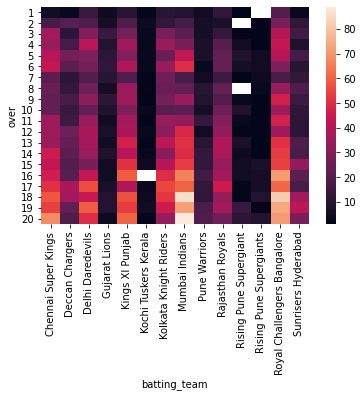

In [31]:
sns.heatmap(pt)

### corrr function

In [32]:
matches.corr() # corelation

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
id,1.000000,0.471087,0.024281,-0.010263,-0.015510,NaN
season,0.471087,1.000000,0.004170,-0.016815,-0.000708,NaN
dl_applied,0.024281,0.004170,1.000000,-0.010893,-0.011640,NaN
win_by_runs,-0.010263,-0.016815,-0.010893,1.000000,-0.565181,NaN
win_by_wickets,-0.015510,-0.000708,-0.011640,-0.565181,1.000000,NaN
umpire3,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

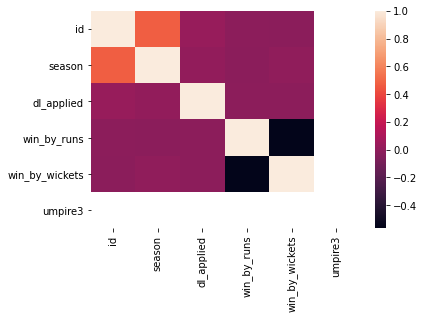

In [33]:
sns.heatmap(matches.corr())

### Rename cols

In [34]:
matches.rename(columns={'city':'place'})

,id,season,place,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


### set_index() and reset_index()

In [35]:
# matches.set_index('id',inplace=True) # TO SET ANY COLUMN TO INDEX

In [36]:
# matches.reset_index(inplace=True)

### Dropping missing data using dropna()

In [37]:
delivery.shape

(150460, 21)

In [38]:
delivery.dropna().shape # for rows

(5369, 21)

In [39]:
delivery.dropna(how='all').shape

(150460, 21)

In [40]:
delivery.dropna(axis=1).shape # for columns

(150460, 18)

In [41]:
delivery.dropna(axis=1,how='all').shape

(150460, 21)

In [42]:
delivery.dropna(subset=['fielder']).shape

(5369, 21)

### Filling missing values using fillna()

In [43]:
delivery.fillna(0)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,0,0,0
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,0,0,0
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,0,0,0


In [44]:
delivery['fielder'].fillna("Not Specified")

0         Not Specified
1         Not Specified
2         Not Specified
3         Not Specified
4         Not Specified
              ...      
150455    Not Specified
150456          NV Ojha
150457    Not Specified
150458    Not Specified
150459    Not Specified
Name: fielder, Length: 150460, dtype: object

In [45]:
delivery['fielder'].fillna(method='bfill') #before fill

0         Mandeep Singh
1         Mandeep Singh
2         Mandeep Singh
3         Mandeep Singh
4         Mandeep Singh
              ...      
150455          NV Ojha
150456          NV Ojha
150457              NaN
150458              NaN
150459              NaN
Name: fielder, Length: 150460, dtype: object